# Forest Cover Type Prediction

## Project description : 
*Get started on this competition with Kaggle Scripts. No data download or local environment needed!*

*Random forests? Cover trees? Not so fast, computer nerds. We're talking about the real thing.*

*In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.*

*This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.*

Every variables described in the description seem to be cartographic, no trap here, we can use them all.

## Ressources : 
* data origin : Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## github :
 https://github.com/ClaireGayral/formation_openclassroom/tree/master/P8_gayral_claire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle


DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"

## my .py : 
from script01_duplicates import *
from script02_missing_values_treatment import *
from script03_univariate_analysis import *
from script04_multivariate_analysis import *
from script05_CV_regression import *
from script06_reduce_dim import *

## extract list of text :
from bs4 import BeautifulSoup
import re
# from sklearn.feature_extraction.s import s# import ENGLISH_STOP_WORDS

# from sklearn import model_selection 
# from sklearn import preprocessing
# from sklearn import neighbors
# from sklearn import linear_model

# from sklearn.impute import KNNImputer
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import fbeta_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import fowlkes_mallows_score
# from sklearn.metrics.pairwise import pairwise_kernels


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression

# from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram


from bs4 import BeautifulSoup
import nltk
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
from gensim import corpora
from gensim import models
from gensim.models import FastText

## Plan du notebook :


Pour faciliter la lecture, il est possible de revenir à ce sommaire, en cliquant sur [back to menu](#menu) chaque fois qu'il apparaît. A partir de ce menu, il est possible de naviguer entre les parties en cliquant sur leur titre.


<a id ="menu"></a>
1. [Exploration of data : ](#section1)
    1. [Outputs - the soils](#section1.1)
    2. [Preprocessing sur les titres/corpus](#section1.2)
    
2. [Création de la variable de sortie - les tags](#section2)
    1. [Projection des tags](#section2.1)
    2. [Regroupement des tags](#section2.2)
    3. [Construction d'une variable retour y](#section2.3)
    
3. [Traitements sur le text](#section3)
    1. [Preprocessing sur les tokens](#section1.2)
        2. [Tokenization](#section3.1.1)
        3. [Stopwords](#section3.1.2)
        4. [Lemmatization](#section3.1.3)   
    2. [Représentation des mots](#section3.2)
          1. [Bag of Words](#section3.2.1)
          2. [tf-idf](#section3.2.2)
          3. [Word to vect](#section3.2.3)       
          4. [Représentation en nuage de mots](#section3.2.4)
<!--     3. [Réduction de dimension](#section3.3) -->


# How to reconcile categorical and numerical data for classification ? 


# 1. Exploration of data : 

In [2]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
print("train data shape : ", df_train.shape)
df_train.head()

train data shape :  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)
print("train data shape : ", df_test.shape)
df_test.head()

train data shape :  (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


A first reading of the data allows to separate the input variables from the output variables : 

In [64]:
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

<a id ="section1.1"></a>
[back to menu](#menu)

## 1.A  Categorical data : 
Let's begin with input data. I first split categorical and numerical data to analyse them. In the [project data description](https://www.kaggle.com/c/forest-cover-type-prediction/data) every column is well defined.

### Of the input 

In [299]:
soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]
## remove text in var name to clarify plots : 
import re
def get_final_int(x) : return(int(re.split(r'(\d+)', x)[-2]))

map_soil_var = {var : get_final_int(var) for var in soil_vars}
soil_cat = X.loc[:,soil_vars] 
soil_cat = soil_cat.rename(map_soil_var, axis=1)
soil_cat = soil_cat.idxmax(axis=1)

map_area_var = {var : get_final_int(var) for var in area_vars}
area_cat = X.loc[:,area_vars] 
area_cat = area_cat.rename(map_area_var, axis=1)
area_cat = area_cat.idxmax(axis=1)

A quick check of the categorical variables shows that the classes are well separated (we are not in multi-label classification)

In [300]:
tmp = X.loc[:, soil_vars].sum(axis=1).value_counts()
print("Percentage of one-classe soil : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

tmp = X.loc[:, area_vars].sum(axis=1).value_counts()
print("Percentage of one-classe area : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

Percentage of one-classe soil :  100.0 %
Percentage of one-classe area :  100.0 %


Univariate analysis :

In [301]:
X_cat = pd.concat((soil_cat,area_cat), axis=1)
X_cat = X_cat.rename({0:"soil_type", 1: "area"}, axis=1)

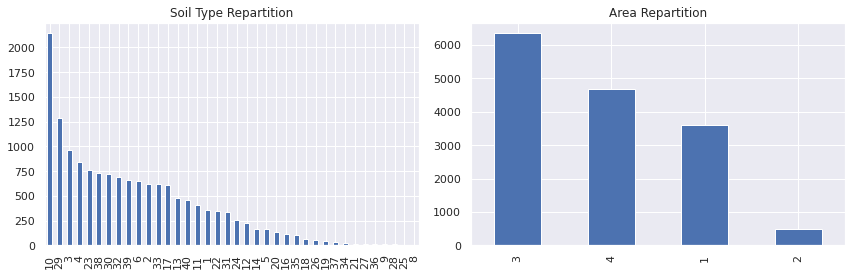

In [303]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# sns.countplot(x = "soil_type", data = X_cat, sort)
X_cat["soil_type"].value_counts().plot(kind= "bar")
plt.title("Soil Type Repartition")
plt.subplot(1,2,2)
X_cat["area"].value_counts().plot(kind= "bar")
plt.title("Area Repartition")
plt.tight_layout()
plt.show()

Note that some categories like "soil_type_25" or "2" are very badly represented

Bivariate analysis :

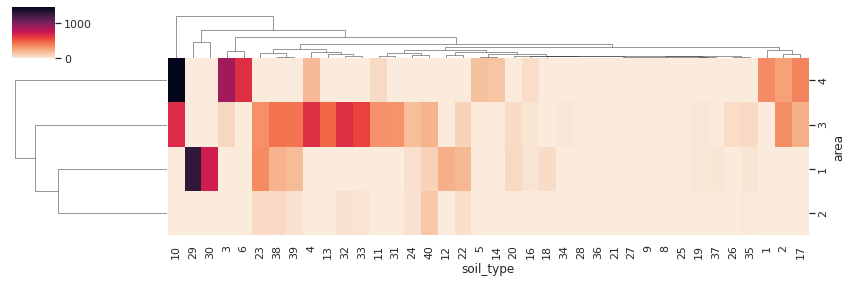

In [327]:
sns.clustermap(pd.crosstab(X_cat["area"], X_cat["soil_type"]),
               figsize=(12, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

The distribution of the two categories is structured: we will have to pay attention to the correlation between the two. 
It may be a good idea to use the text description of soil to gather them (TODO : see if text-mining is relevant)

In [306]:
from caterogical_vars_description import *
cat_vars = soil_vars + area_vars

 ### Output :
 As the output is a categorical variable, let's have a look on it :

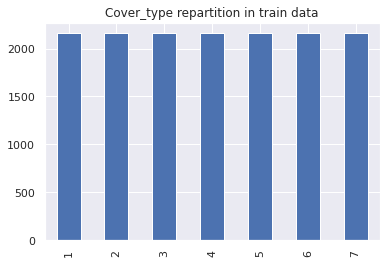

In [307]:
# sns.countplot(x = "soil_type", data = X_cat, sort)
y.value_counts().plot(kind= "bar")
plt.title("Cover_type repartition in train data")
plt.xticks(rotation=90)
plt.show()

The output categories are well represented
### Output and input categorical link :
Let's reveal the correlation between our categories and the output variable : 

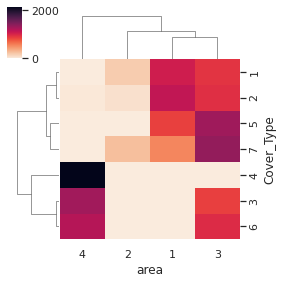

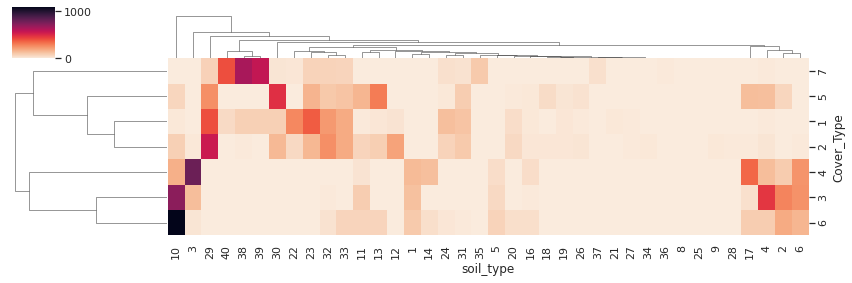

In [318]:
X_caty = pd.concat((X_cat, y), axis = 1)
sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["area"]),
               figsize=(4, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["soil_type"]),
               figsize=(12,4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,cat_vars], y)

svm = LinearSVC(dual=False).fit(X_train,y_train)
y_pred = svm.predict(X_test)
y_pred = pd.Series(y_pred,index = y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.51      0.48       534
           2       0.47      0.51      0.49       546
           3       0.52      0.48      0.50       540
           4       0.76      0.72      0.74       555
           5       0.62      0.56      0.59       540
           6       0.51      0.58      0.54       530
           7       0.90      0.81      0.85       535

    accuracy                           0.59      3780
   macro avg       0.61      0.59      0.60      3780
weighted avg       0.61      0.59      0.60      3780



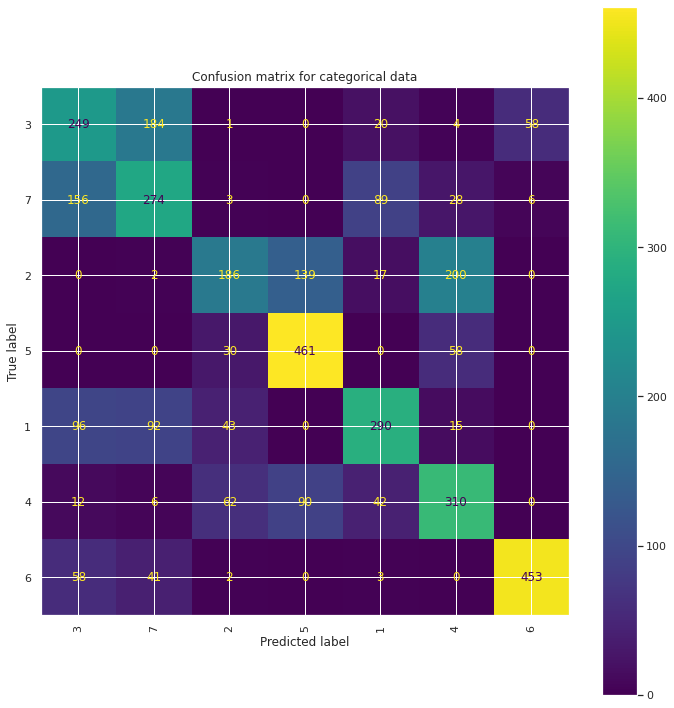

In [358]:
## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
# plt.savefig(res_path+"figures/confusion_matrix_"+)
plt.tight_layout()
plt.show()

In [366]:
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

In [367]:
sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo")

0.758935134379536

In [368]:
sklearn.metrics.balanced_accuracy_score(y_test,y_pred)

0.5864548837694786

In [369]:
sklearn.metrics.cohen_kappa_score(y_test,y_pred)

0.5194729687725931

In [372]:
sklearn.metrics.matthews_corrcoef(y_test,y_pred)

0.5213428766229012

In [371]:
sklearn.metrics.hinge_loss(y_test,Y_pred)

0.8238095238095238

blabla

### Feature engineering : 

There's a real link between the categorical inputs and the classification. Let's drop the non determinant categories :

In [388]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for k in range(5,6):#X_train.shape[1]):
    select_var = SelectKBest(chi2, k=k).fit(X_train, y_train)
    X_new = pd.DataFrame(select_var.transform(X_train),
                        columns=select_var.get_feature_names_out())
    X_new_test = 
    svm = LinearSVC(dual=False).fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    y_pred = pd.Series(y_pred,index = y_test)

In [ ]:
## https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
mean_score = rfecv.cv_results_["mean_test_score"]
plt.plot(
    range(min_features_to_select, len(mean_score) + min_features_to_select),
    mean_score
)
plt.show()

In [ ]:
len(rfecv.feature_names_in_)

In [407]:
rfecv.get_feature_names_out()

array(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area1', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4'], dtype=object)

SyntaxError: invalid syntax (824162531.py, line 1)

<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Numerical data 

In [190]:
num_vars = [col for col in X.columns if col not in cat_vars]
X_num = X.loc[:,num_vars]
X_num.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


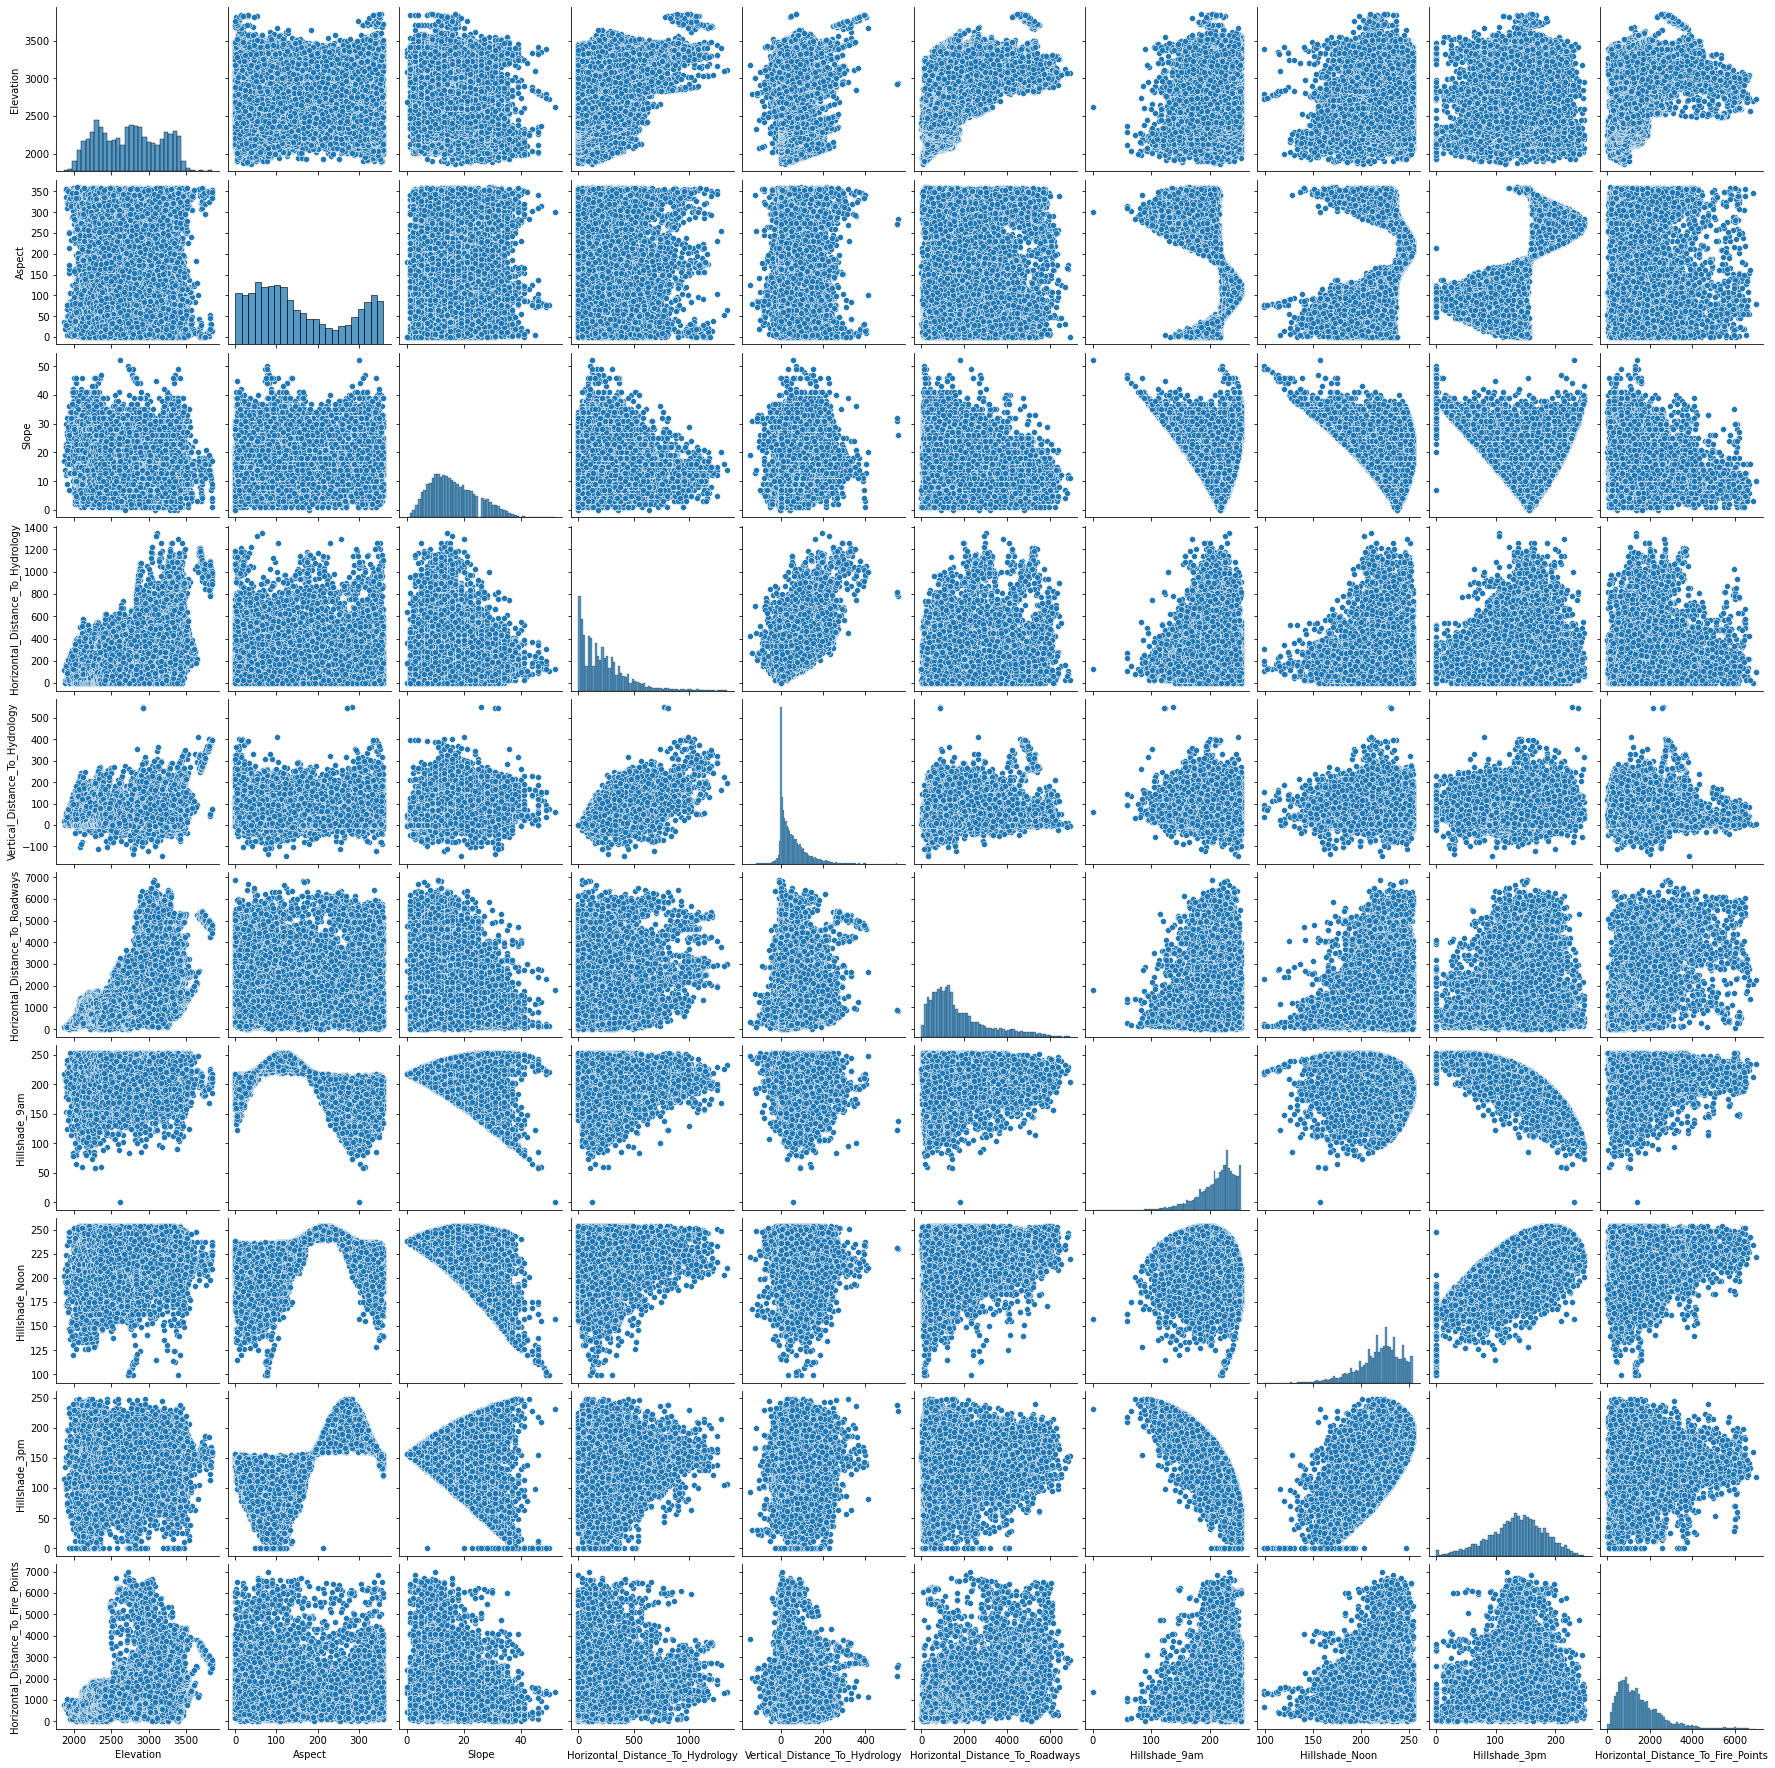

In [195]:
X_numy = pd.concat((X_num, y), axis = 1)

palette = sns.color_palette("tab10", len(y.unique()))
# sns.pairplot(X_numy, hue = "Cover_Type", palette = palette, kind="kde")
# plt.savefig(RES_PATH + "figures/"+"pairplot_kde_colored_by_output")
sns.pairplot(X_num)
plt.savefig(RES_PATH + "figures/"+"pairplot")
plt.show()

### Multivariate analysis on numerical variables

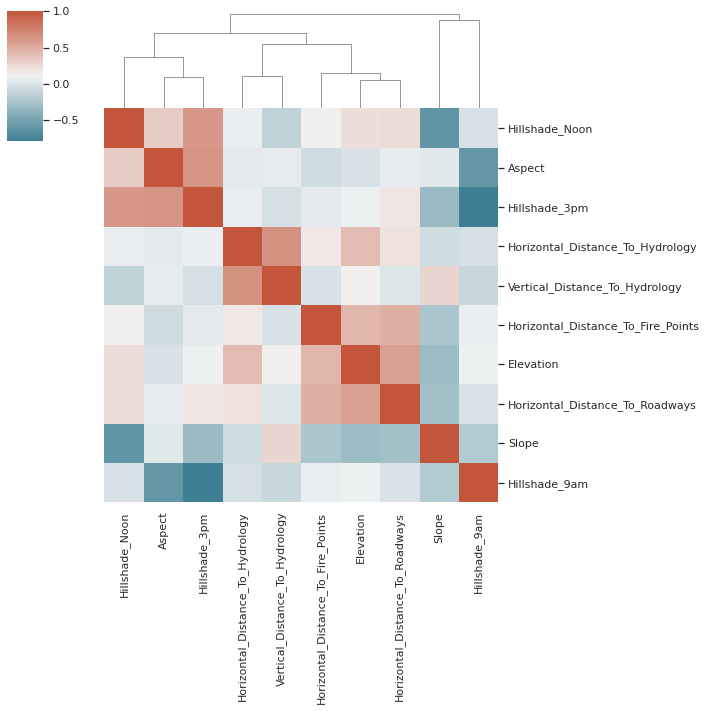

In [238]:
from sklearn.preprocessing import StandardScaler
my_std = StandardScaler().fit(X_num)
X_num_std = pd.DataFrame(my_std.transform(X_num), index=X_num.index, columns=X_num.columns)
corr_std = X_num_std.corr()
cg = sns.clustermap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
cg.ax_row_dendrogram.set_visible(False)
plt.savefig(RES_PATH + "figures/"+"correlation_matrix")


Some variables are correlated and anti-correlated. A selection of variables will be mandatory. 
### Numerical VS output : 

In [239]:
X_train = pd.concat((X_num, X_cat ,y), axis = 1)

# for num_v in num_vars : 
#     print(num_v)
#     plt.figure(figsize=(15,4))
#     plt.subplot(1,2,1)
#     sns.violinplot(y = num_v, x = "Cover_Type", data = X_train)
#     plt.subplot(1,2,2)
#     sns.violinplot(y = num_v, x = "area", data = X_train)
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()
#     plt.figure(figsize=(15,4))
#     sns.violinplot(y = num_v, x = "soil_type", data = X_train)
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

Hillshade_Noon


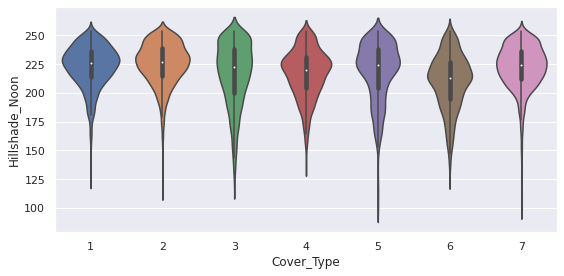

Aspect


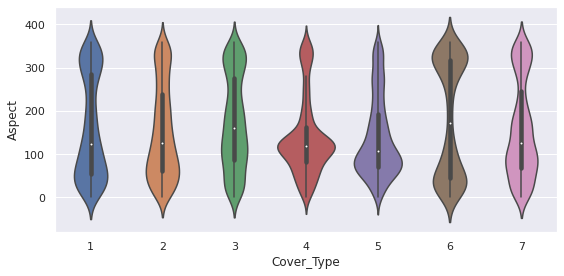

Hillshade_3pm


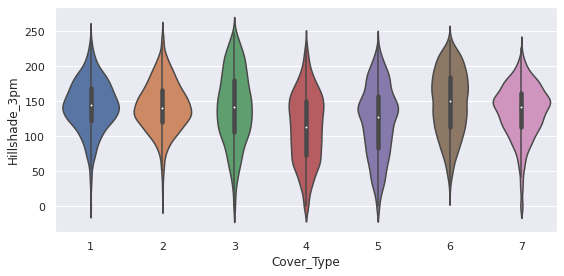

Horizontal_Distance_To_Hydrology


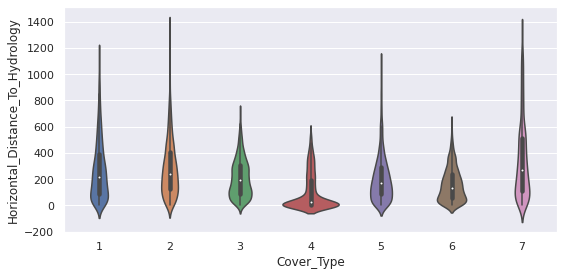

Vertical_Distance_To_Hydrology


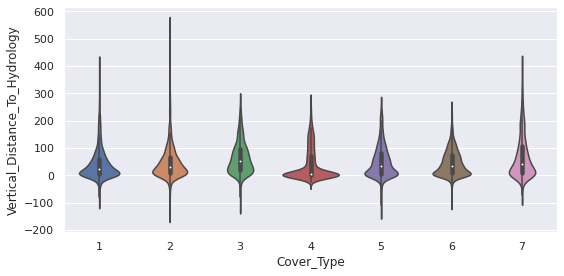

Horizontal_Distance_To_Fire_Points


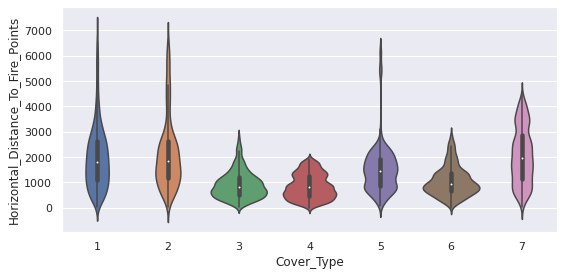

Elevation


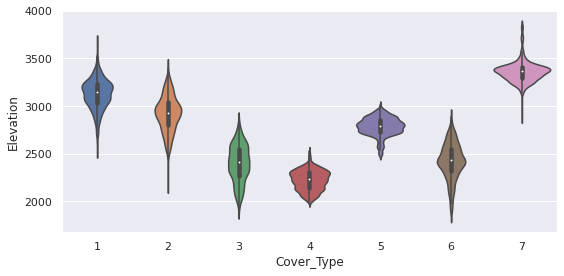

Horizontal_Distance_To_Roadways


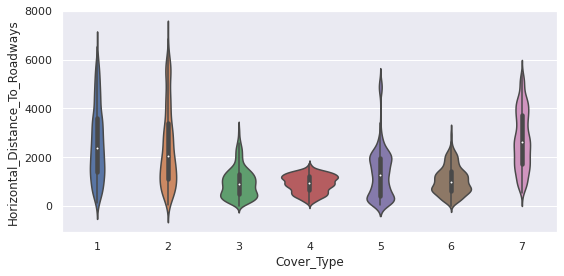

Slope


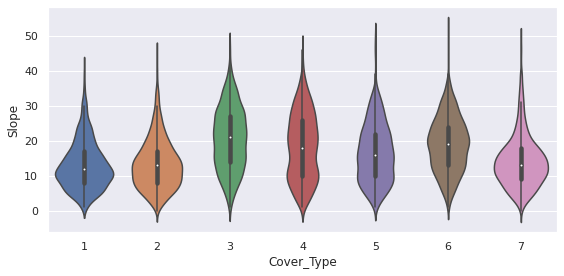

Hillshade_9am


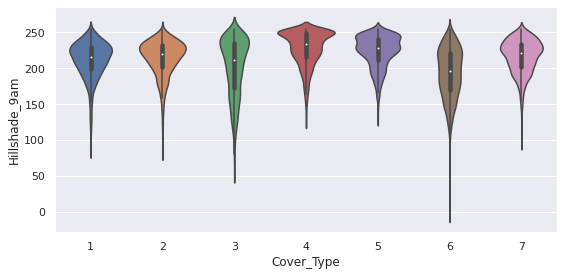

In [242]:
for num_v in X_num_std.columns[cg.dendrogram_col.reordered_ind] : 
    print(num_v)
    plt.figure(figsize=(8,4))
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_train)
#     plt.yscale("log")
    plt.tight_layout()
    plt.show()

The variable "Elevation" seems to separate the soil covers well. The other variables do not seem to be discriminating.
### Feature selection : 

* https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,cat_vars], y)

In [277]:
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.svm import LinearSVC
anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC(dual=False)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

/home/clairegayral/.env_python/openclassroom/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 6  7 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clairegayral/.env_python/openclassroom/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest(k=3)),
                ('linearsvc', LinearSVC(dual=False))])

In [278]:
from sklearn.metrics import classification_report
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=True))


              precision    recall  f1-score   support

           1       1.00      0.00      0.00       563
           2       0.30      0.01      0.02       546
           3       1.00      0.00      0.00       548
           4       0.60      0.91      0.73       522
           5       1.00      0.00      0.00       550
           6       0.55      0.55      0.55       547
           7       0.21      1.00      0.34       504

    accuracy                           0.34      3780
   macro avg       0.67      0.35      0.23      3780
weighted avg       0.67      0.34      0.23      3780



              precision    recall  f1-score   support

           1       0.50      0.54      0.52       563
           2       0.49      0.53      0.51       546
           3       0.58      0.34      0.43       548
           4       0.65      0.85      0.74       522
           5       0.62      0.56      0.59       550
           6       0.56      0.62      0.59       547
           7       0.88      0.83      0.85       504

    accuracy                           0.61      3780
   macro avg       0.61      0.61      0.60      3780
weighted avg       0.61      0.61      0.60      3780

